<a href="https://colab.research.google.com/github/dineshkk15/hello-world/blob/main/Python_advance/04_Pandas_Pivot_Tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Pivot Tables

Load data.

In [ ]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\DK\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df.groupby(['job_title_short','job_country'])['salary_year_avg'].median()

job_title_short    job_country
Business Analyst   Afghanistan        NaN
                   Albania            NaN
                   Algeria            NaN
                   Angola             NaN
                   Argentina      71100.0
                                   ...   
Software Engineer  Venezuela          NaN
                   Vietnam        53600.0
                   Yemen              NaN
                   Zambia             NaN
                   Zimbabwe           NaN
Name: salary_year_avg, Length: 1387, dtype: float64

In [ ]:
df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [ ]:
df.pivot_table(index='job_title_short', aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [ ]:
df.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc='median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [ ]:
df.groupby('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

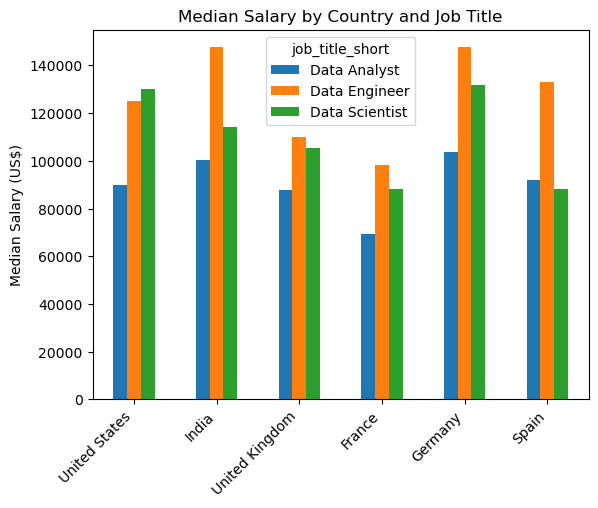

In [ ]:
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary (US$)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()

## Notes

- `pivot_table()`: Create a pivot table as a DataFrame.
* Syntax: `pivot_table(values='column_to_aggregate', index='row_index', columns='column_index', aggfunc='mean')`



## Example - Median Salary

Creating a pivot table to calculate the median of `salary_year_avg` for each `job_country`.

In [ ]:
df.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc='median')

You might've noticed this is similar to what we did before in our Pandas basics exercise.

In [ ]:
df.groupby('job_title_short')['salary_year_avg'].median()


We basically get the same results

## Example - Counting Job Titles

Let's find the count of jobs by the `job_title_short` column.

In [ ]:
df.pivot_table(index='job_title_short', aggfunc='size')

In [ ]:
# use groupby: df.pivot_table(index='job_title_short', aggfunc='size')

df.groupby('job_title_short').size()

## Example - Country & Job Title Analysis

In [ ]:
df.groupby(['job_country', 'job_title_short'])['salary_year_avg'].agg(['max', 'median', 'min']).dropna()

In [ ]:
df.pivot_table(
    values='salary_year_avg',
    index=['job_country', 'job_title_short'],
    aggfunc={'salary_year_avg': ['min', 'max', 'median']}
)

# Example - Pivoting Countries and Job Title's Median Salary

In [ ]:
df_job_country_salary = df.pivot_table(
    values='salary_year_avg',        # The data to aggregate
    index='job_country',             # Rows (index of pivot table)
    columns='job_title_short',       # Columns (pivot table headers)
    aggfunc='median'                 # Aggregation function
)

df_job_country_salary

## Plotting Results

In [ ]:
# make a list of top 6 countries
top_countries = df['job_country'].value_counts().head(6).index

# filter df_job_country_salary for top 6 countries
df_job_country_salary = df_job_country_salary.loc[top_countries]

# filter df_job_country_salary for list of 6 job titles
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist'] # 'Senior Data Analyst', 'Senior Data Engineer', 'Senior Data Scientist']
df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()
